In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 读取文件
final = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACCnewtry1.out",  delimiter=",")
fina2 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACCnewtry200-250.out",  delimiter=",")
fina3 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACCnewtry250-300.out",  delimiter=",")
fina4 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACCnewtry300-330.out",  delimiter=",")

In [3]:
d1 = np.hstack((final,fina2))
d2 = np.hstack((d1,fina3))
d3 = np.hstack((d2,fina4))

In [4]:
ddd = d3[:2160]

In [5]:
# 读取文件
final330 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACC330-338.out",  delimiter=",")
final338 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACC338-340.out",  delimiter=",")

In [6]:
result330 = np.zeros(120)
result330[0:72] =final330[0:72]
result330[72:96] =final338[0:24]
result330[96:120] =final338[0:24]

In [7]:
diao1 = np.hstack((ddd,result330))

In [8]:
diao1.shape

(2280,)

In [9]:
finanew1 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACC340-390.out",  delimiter=",")
finanew2 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACC390-440.out",  delimiter=",")
finanew3 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACC440-490.out",  delimiter=",")
xxx1 = np.hstack((finanew1,finanew2))
xxx2 = np.hstack((xxx1,finanew3))

In [10]:
diao2 = np.hstack((diao1,xxx2))

In [11]:
diao2.shape

(4080,)

In [12]:
finanew44 = np.loadtxt(fname="/scratch/user/xiliangdiao/firstpaper/ACC490-500N.out",  delimiter=",")

In [13]:
diao3 = np.hstack((diao2,finanew44))

In [14]:
diao3.shape

(4680,)

In [15]:
diao4 = diao3[:4200]

In [16]:
ww2 = np.convolve(diao4, np.ones((60,))/60, mode='valid')


In [20]:
nn = np.nanmean(ww2)

In [24]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

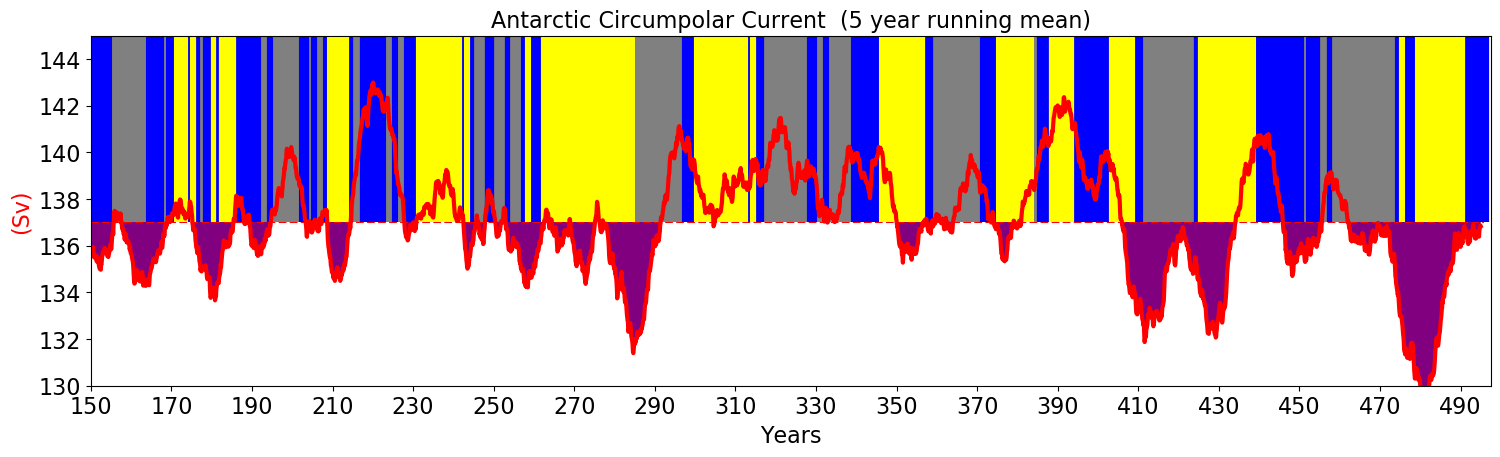

In [29]:
t = np.arange(0,4141,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'red',linewidth=3)
plt.hlines(nn, 0, 4150, colors = "red",linestyles = "dashed")
ax0.fill_between(t,nn,ww2,where=ww2 < nn,facecolor='purple', alpha=1)
########################################

plt.vlines(noxxx, nn, 145, colors = "grey")
plt.vlines(mrpxxx, nn, 145, colors = "blue")
plt.vlines(xxx, nn, 145, colors = "yellow")

#plt.xticks(range(0,2161,240), ['150','170','190','210', '230', '250','270','290','310','330'],**my_font)
plt.xticks(range(0,4161,240), ['150','170','190','210', '230', '250','270','290','310','330','350','370','390','410', '430', '450','470','490'],**my_font)
plt.yticks(**my_font)

plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(Sv)',color= 'red',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.axis("tight")
#plt.plot([0,-ww2[0]],[320,2300])
ax0.set(ylim=(130, 145),xlim=(0, 4170))
ax0.set_title('Antarctic Circumpolar Current  (5 year running mean)',**my_font)
plt.savefig("ACC.png",bbox_inches='tight',dpi=fig.dpi)

In [18]:
np.savetxt('ACCbest.out',ww2)